In [73]:
import steamreviews
import nltk
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib
import matplotlib.pyplot as plt

try:
    nltk.data.find('sentiment/vader_lexicon')
except LookupError:
    nltk.download('vader_lexicon')

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     d:\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [75]:
app_id = 1962663

In [77]:
review_dict, query_count = steamreviews.download_reviews_for_app_id(app_id)

[appID = 1962663] expected #reviews = 44447


In [78]:
df = pd.DataFrame(review_dict['reviews']).T

In [79]:
df.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck
194707442,194707442,"{'steamid': '76561198001047926', 'num_games_ow...",polish,bardzoi dobra kurla,1746990590,1746990590,True,0,0,0.5,0,False,False,False,False
194706811,194706811,"{'steamid': '76561199803756401', 'num_games_ow...",english,i like graphics of this game,1746989968,1746989968,True,0,0,0.5,0,False,False,False,False
194706795,194706795,"{'steamid': '76561199379516482', 'num_games_ow...",latam,"Una pistola haciendome el amor, Nada nuevo",1746989954,1746989954,False,0,0,0.5,0,False,False,False,False
194706616,194706616,"{'steamid': '76561199441508391', 'num_games_ow...",english,disgusting hot garbage i would rather eat some...,1746989819,1746989819,False,0,0,0.5,0,False,False,False,False
194706415,194706415,"{'steamid': '76561198316470715', 'num_games_ow...",english,[h1]⚠️ Ricochet Windows Kernel Anti-Cheat requ...,1746989643,1746989643,False,0,0,0.5,0,True,False,False,False


In [80]:
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')

In [81]:
df.shape

(44461, 15)

In [82]:
df = df.loc[df['language'] == 'english']

In [83]:
df.shape

(18578, 15)

In [84]:
split_one = pd.to_datetime('2022-05-16 00:00:00')
split_two = pd.to_datetime('2022-11-16 00:00:00')
split_three = pd.to_datetime('2022-12-16 00:00:00')

df_pre = df.loc[(df['timestamp_created'] >= split_one) & (df['timestamp_created'] < split_two)]
df_post = df.loc[(df['timestamp_created'] >= split_two) & (df['timestamp_created'] < split_three)]

In [86]:
df_pre.shape

(0, 15)

In [87]:
df_post.shape

(5905, 15)

In [88]:
df.shape

(18578, 15)

In [89]:
min(df['timestamp_created'])

Timestamp('2022-11-16 18:00:12')

In [90]:
analyzer = SentimentIntensityAnalyzer()

In [91]:
df_post['polarity_scores'] = [analyzer.polarity_scores(text)['compound'] for text in df_post['review']]

In [92]:
df_post['voted_up'] = df_post['voted_up'].replace({True : 0, False : 1})

In [95]:
df_post[['voted_up', 'polarity_scores']].corr(method = 'pearson')

,voted_up,polarity_scores
voted_up,1.000000,-0.362673
polarity_scores,-0.362673,1.000000


In [97]:
labels = 'Recommended', 'Not Recommended'
sizes = [df_post['voted_up'].value_counts()[0], df_post['voted_up'].value_counts()[1]]
colors = ['blue', 'red']

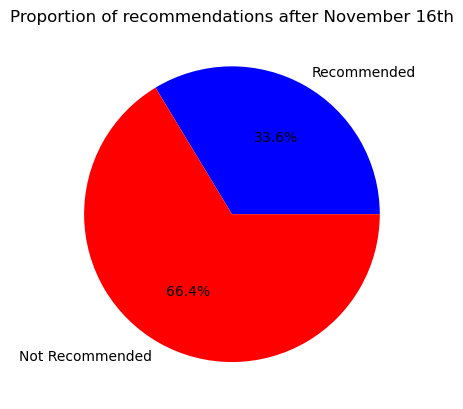

In [100]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
ax.set_title('Proportion of recommendations after November 16th')
plt.show()

In [103]:
cats = ['Recommended', 'Not Recommended']

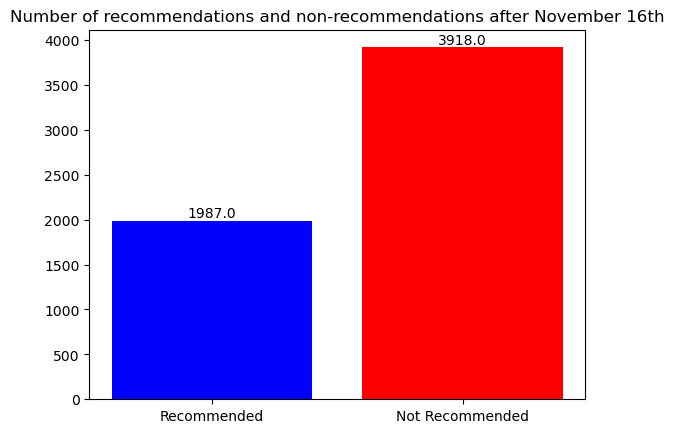

In [106]:
fig, ax = plt.subplots()
ax.bar(cats, sizes)
bars = ax.bar(cats, sizes, color = colors)

ax.set_title('Number of recommendations and non-recommendations after November 16th')

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.1f}',
        ha='center', va='bottom'
    )

plt.show()

In [110]:
df_post['polarity_scores'].mean()

-0.004778628281117698

In [111]:
post_list = [score for score in df_post['polarity_scores']]

def sign_counter(lst):
    pos = 0
    neg = 0
    zer = 0
    for num in lst:
        if num > 0:
            pos += 1
        if num < 0:
            neg += 1
        if num == 0:
            zer += 1
    return (pos, neg, zer)

In [112]:
sign_counter(post_list)

(2281, 2323, 1301)

In [113]:
labels2 = 'Positive', 'Negative', 'Zero'
sizes2 = [2281, 2323, 1301]
colors2 = ['blue', 'red', 'gray']

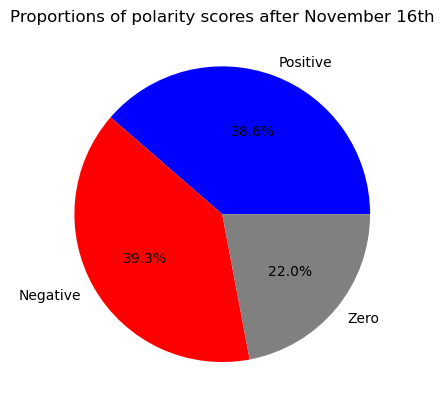

In [114]:
fig, ax = plt.subplots()
ax.pie(sizes2, labels=labels2, autopct='%1.1f%%', colors=colors2)
ax.set_title('Proportions of polarity scores after November 16th')
plt.show()